## Lab 6: The Bellman Equation in Reinforcement Learning

### **Objective**:
In this lab, you will better understand and apply the Bellman Equation in a Markov Decision Process (MDP) framework.

### Prerequisites:

•	Basic Python programming

•	Familiarity with the Reinforcement Learning equations from the class lecture

•	Required Libraries: numpy, matplotlib, seaborn

### **1. Introduction to the Bellman Equation**

The Bellman Equation is an RL tool which calculates values based on rewards. The value of a state is determined from the rewards of certain actions and the expected values of future states. It is particularly useful for evaluating how beneficial a policy is when an agent follows it in a certain environment.

#### **1.1: Theoretical Overview**

For Value Functions: $V(s) = \max_{a} \sum_{s{\prime}} P(s{\prime} | s, a) \left[ R(s, a, s{\prime}) + \gamma V(s{\prime}) \right]$, where:

•   	 $V(s)$ : Value of state  $s$ .

•   	 $P(s{\prime} | s, a)$ : Probability of transitioning to state  $s{\prime}$  from  $s$  by taking action  $a$ .

•   	 $R(s, a, s{\prime})$ : Reward for transition  $s \rightarrow s{\prime}$  with action  $a$ .

•   	 $\gamma$ : Discount factor.


For Q-Functions: $Q(s, a) = \sum_{s{\prime}} P(s{\prime} | s, a) \left[ R(s, a, s{\prime}) + \gamma \max_{a{\prime}} Q(s{\prime}, a{\prime}) \right]$




#### **Exercise 1.1 Solve a Bellman Equation by Hand**

Given the following MDP:

•	States:  $S = \{A, B\} $

•	Actions:  $A = \{a_1, a_2\} $

•	Rewards: $ R(A, a_1, B) = 10$, $R(B, a_2, A) = 5 $

•	Transitions: $P(B | A, a_1) = 1.0 $, $ P(A | B, a_2) = 1.0 $

•	Discount Factor:  $\gamma = 0.9 $

Find $ V(A)$  and  $V(B)$ .

#### **Solution:**

For  $V(A)$:

$V(A) = \max_{a} \left\{ P(B | A, a_1) \cdot [R(A, a_1, B) + \gamma V(B)] \right\}$


$V(A) = 1.0 \cdot \left[ 10 + 0.9 \cdot V(B) \right]$


For  $V(B)$:

$V(B) = \max_{a} \left\{ P(A | B, a_2) \cdot [R(B, a_2, A) + \gamma V(A)] \right\}$


$V(B) = 1.0 \cdot \left[ 5 + 0.9 \cdot V(A) \right]$


**Solve simultaneously:**

$V(A) = 10 + 0.9V(B)$


$V(B) = 5 + 0.9V(A)$

**Substitute  $V(A)$:**

$V(B) = 5 + 0.9(10 + 0.9V(B))$


$V(B) = 14 + 0.81V(B)$


$0.19V(B) = 14$


$V(B) = \frac{14}{0.19} \approx 73.68$


$V(A) = 10 + 0.9 \cdot 73.68 \approx 76.31$


#### **Exercise 1.2 Answer the following questions.**

1.	How does the discount factor  $\gamma$  affect the values  $V(s)$ ?

2.	What happens if the rewards are negative?

**Answers:**

1.	Effect of  $\gamma$ :

•	High  $\gamma$ : More focus on future rewards.

•	Low  $\gamma$ : Emphasis on immediate rewards.

2.	Negative Rewards:

•	The agent learns to avoid paths with cumulative negative rewards.

### **2. Practical Implementation of the Bellman Equation**


#### **2.1 Setting Up an MDP Environment**
Simulate a Gridworld with rewards.

In [118]:
import numpy as np

# Gridworld setup
grid_size = 4
rewards = np.zeros((grid_size, grid_size))
rewards[3, 3] = 1  # Goal state
rewards[1, 1] = 0.2  # Penalty state

# Actions: up, down, left, right
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

def is_valid_state(x, y):
    return 0 <= x < grid_size and 0 <= y < grid_size


#### **Step 2.2: Implementing Bellman Updates**
Apply the Bellman Update Rule.

In [119]:
def bellman_update(value_function, rewards, gamma):
    new_value_function = np.copy(value_function)
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) == (3, 3):  # Skip terminal state
                continue
            max_value = float('-inf')
            for action in actions:
                nx, ny = x + action[0], y + action[1]
                if is_valid_state(nx, ny):
                    value = rewards[x, y] + gamma * value_function[nx, ny]
                    max_value = max(max_value, value)
            new_value_function[x, y] = max_value
    return new_value_function

# Initialize value function
value_function = np.zeros((grid_size, grid_size))
gamma = 0.9

# Perform updates
for _ in range(10):  # 10 iterations
    value_function = bellman_update(value_function, rewards, gamma)

print("Value Function:\n", value_function)

Value Function:
 [[0.48560164 0.61704148 0.48560164 0.43704148]
 [0.61704148 0.68560164 0.61704148 0.48560164]
 [0.48560164 0.61704148 0.48560164 0.43704148]
 [0.43704148 0.48560164 0.43704148 0.        ]]


#### **Step 2.3 Visualizing the Value Function**

Plot the learned values.




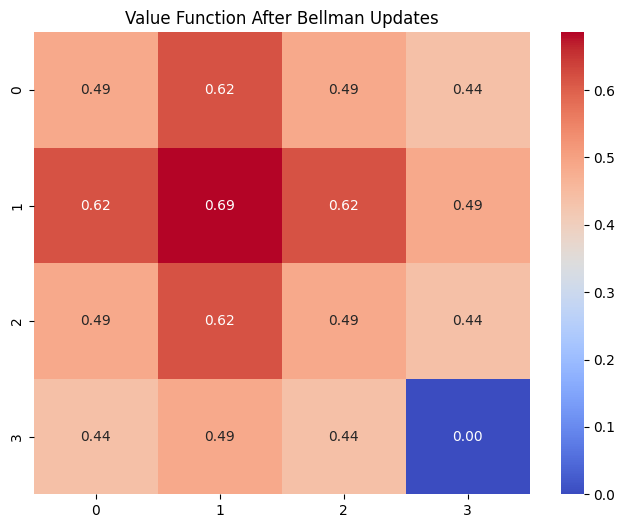

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(value_function, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Value Function After Bellman Updates")
plt.show()

#### **2.4 Questions**

1.	What happens to the value function as the number of iterations increases?
2.	How would the value function change if the reward at (1, 1) was increased to  -0.1 ?

**Answers**
1.	Convergence: The value function stabilizes after sufficient iterations, reflecting the optimal values.
2.	Reward Change: The penalty at (1, 1) would have less impact, encouraging the agent to explore it occasionally.

### **3. Individual Work (Homework)**

**Experimentation Tasks**

1.	Modify the reward structure to include additional penalties and observe the changes in the value function.
2.	Change the discount factor  $\gamma$  to 0.5 and 0.99 and compare the results.
3.	Implement the Bellman equation for  Q(s, a)  instead of  V(s) .

**Key Questions for Analysis**

1.	Which reward structure leads to the fastest convergence?
2.	How does a higher discount factor impact the learned values?
3.	What additional complexities arise when using the Bellman equation for Q-values?

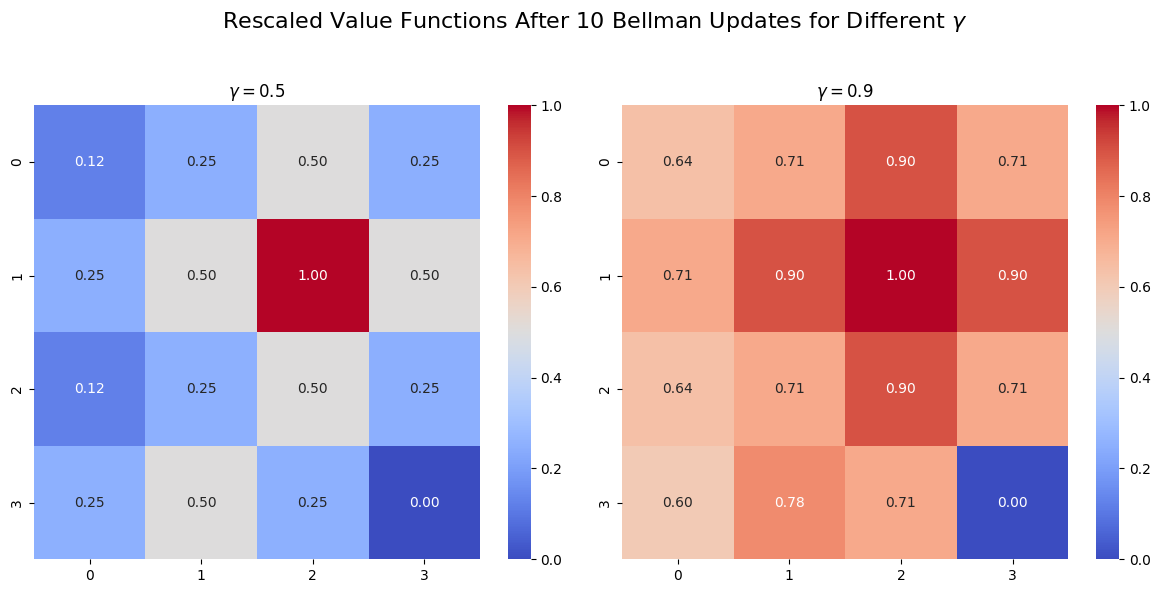

In [130]:
# Gridworld setup
grid_size = 4

rewards = np.zeros((grid_size, grid_size))
rewards[3, 3] = 1  # Goal state
rewards[1, 2] = .2  # Penalty state
rewards[3, 1] = .1  # Penalty state
gammas = [0.5 , 0.9]

# Initialize the figure for subplots
fig, axes = plt.subplots(1, len(gammas), figsize=(12, 6))  # 1 row, len(gammas) columns

# Number of iterations
N = 10
for i, gamma in enumerate(gammas):
    # Initialize value function
    value_function = np.zeros((grid_size, grid_size))

    for _ in range(N):  
        value_function = bellman_update(value_function, rewards, gamma)

    min_val = np.min(value_function)
    max_val = np.max(value_function)
    rescaled_value_function = (value_function - min_val) / (max_val - min_val) if max_val > min_val else value_function

    # Plot heatmap
    sns.heatmap(
        rescaled_value_function, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        vmin=0, 
        vmax=1, 
        ax=axes[i]
    )
    axes[i].set_title(rf"$\gamma = {gamma}$", fontsize=12)  # Title for each subplot

# Add a main title
fig.suptitle(rf"Rescaled Value Functions After {N} Bellman Updates for Different $\gamma$", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

Training complete!
[ 0.         -0.26088426 -0.99949247 -0.16765377]
Q-value for state (0, 0): 0.0 (Best action: 1)
Q-value for state (0, 1): 0.0 (Best action: 0)
Q-value for state (0, 2): -0.2932414801365183 (Best action: 0)
Q-value for state (0, 3): 0.0 (Best action: 3)
Q-value for state (1, 0): 0.0 (Best action: 2)
Q-value for state (1, 1): -0.1895330473394528 (Best action: 2)
Q-value for state (1, 2): 0.0 (Best action: 1)
Q-value for state (1, 3): 0.0 (Best action: 0)
Q-value for state (2, 0): 0.0 (Best action: 1)
Q-value for state (2, 1): 0.0 (Best action: 0)
Q-value for state (2, 2): 0.0 (Best action: 0)
Q-value for state (2, 3): 0.0 (Best action: 0)
Q-value for state (3, 0): 0.0 (Best action: 2)
Q-value for state (3, 1): -0.013550000000000003 (Best action: 1)
Q-value for state (3, 2): 0.0 (Best action: 1)
Q-value for state (3, 3): 0.0 (Best action: 0)


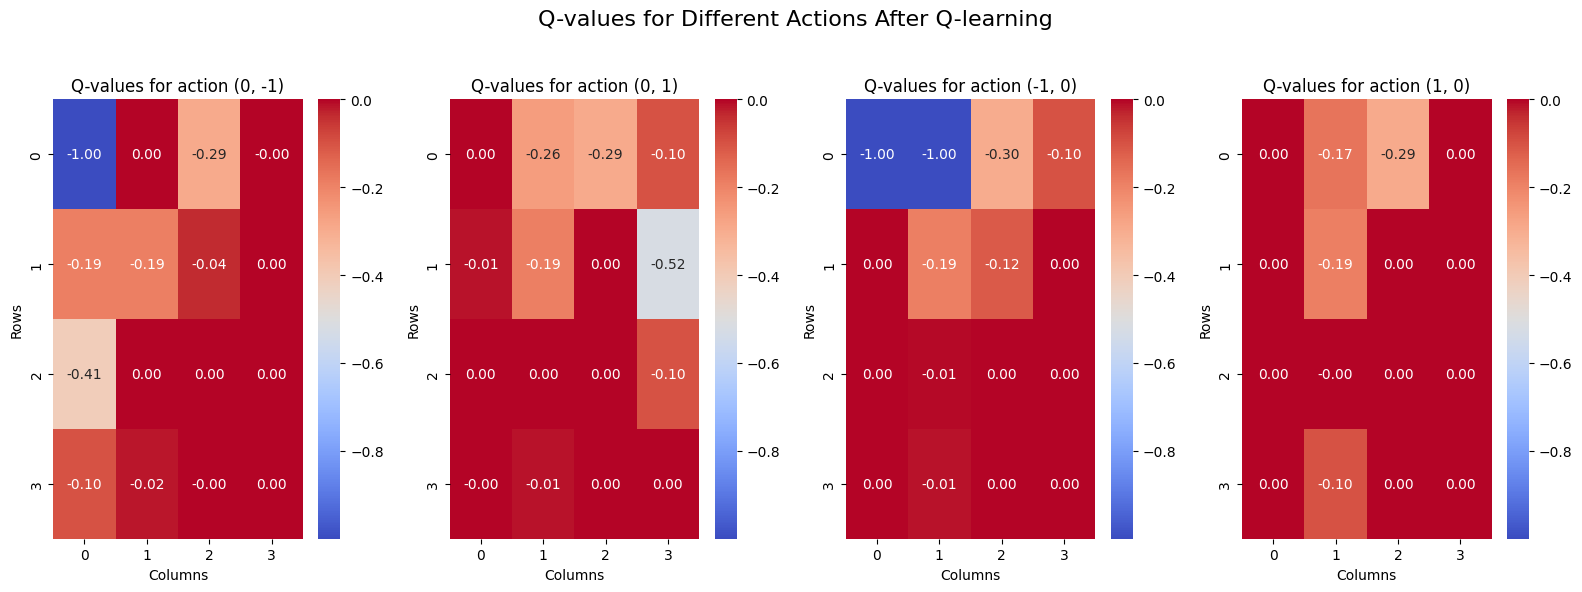

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters for the environment
grid_size = 4  # Grid size for the environment
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate (for Q-learning)
epsilon = 0.1  # Exploration factor (for Q-learning)
epsilon_decay = 0.99  # Decay factor for epsilon
epsilon_min = 0.01  # Minimum epsilon
num_episodes = 1000  # Number of training episodes
max_steps_per_episode = 50  # Max steps per episode

# Reward structure
rewards = np.zeros((grid_size, grid_size))
rewards[3, 3] = 1  # Goal state
rewards[1, 1] = -0.2  # Penalty state
rewards[0, 2] = -0.3  # Penalty state
rewards[3, 1] = -0.05  # Penalty state

# Initialize Q table with zeros
Q = np.zeros((grid_size, grid_size, 4))  # 4 possible actions (up, down, left, right)

# Define actions (up, down, left, right)
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Define valid state checking function (ensures the next state is within bounds)
def is_valid_state(x, y):
    return 0 <= x < grid_size and 0 <= y < grid_size

# Bellman update for Q-values (using Q-learning update formula)
def bellman_update(Q, rewards, gamma):
    new_Q = np.copy(Q)
    for x in range(grid_size):
        for y in range(grid_size):
            for a_idx, action in enumerate(actions):
                if (x, y) == (3, 3):  # Skip terminal state (goal state)
                    continue
                nx, ny = x + action[0], y + action[1]
                if is_valid_state(nx, ny):
                    reward = rewards[x, y]
                    max_q_next = np.max(Q[nx, ny])  # Max Q-value for next state
                    new_Q[x, y, a_idx] = reward + gamma * max_q_next  # Bellman update formula
    return new_Q

# Training loop for Q-learning
for episode in range(num_episodes):
    # Initialize state randomly (here just for example)
    state = (0, 0)  # Start at top-left corner (0, 0)
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        # Choose action using epsilon-greedy strategy
        if np.random.rand() < epsilon:  # Exploration: random action
            action_idx = np.random.choice(len(actions))
        else:  # Exploitation: choose best action based on Q-values
            action_idx = np.argmax(Q[state[0], state[1]])

        # Get the next state and reward after taking the action
        action = actions[action_idx]
        next_state = (state[0] + action[0], state[1] + action[1])
        
        # Ensure next state is valid
        if is_valid_state(next_state[0], next_state[1]):
            reward = rewards[state[0], state[1]]
            next_state = next_state
        else:
            reward = - 1 # Penalty for hitting wall
            next_state = state  # Stay in current state

        # Update the Q-value for the state-action pair
        Q[state[0], state[1], action_idx] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action_idx])

        # Update the state to the next state
        state = next_state
        rewards_current_episode += reward

        if state == (3, 3):  # Goal reached (terminal state)
            done = True
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Store the rewards for the current episode (optional)
    # rewards_all_episodes.append(rewards_current_episode)

print("Training complete!")
# You can visualize the Q-values for each state-action pair
print(Q[0,1,:])
# Visualization (heatmap for the best action's Q-value)
for x in range(grid_size):
    for y in range(grid_size):
        best_action_idx = np.argmax(Q[x, y])  # Choose the action with highest Q-value
        print(f"Q-value for state ({x}, {y}): {Q[x, y, best_action_idx]} (Best action: {best_action_idx})")

# Visualization of Q-values
# Plot heatmaps for Q-values corresponding to different actions
fig, axes = plt.subplots(1, 4, figsize=(16, 6))  # 4 subplots for 4 actions

for i, action in enumerate(actions):
    # Extract Q-values for the specific action
    Q_action = Q[:, :, i]
    sns.heatmap(Q_action, annot=True, fmt=".2f", cmap="coolwarm", vmin=np.min(Q), vmax=np.max(Q), ax=axes[i])
    axes[i].set_title(f"Q-values for action {action}", fontsize=12)
    axes[i].set_xlabel("Columns")
    axes[i].set_ylabel("Rows")

# Add a main title
fig.suptitle("Q-values for Different Actions After Q-learning", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()